<a href="https://colab.research.google.com/github/montali/LastDuel/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost keras_tuner

In [2]:
import catboost
import pandas as pd

In [3]:
performances = pd.read_csv("data_for_task.csv", index_col=0).dropna(axis=0)
performances

,id,average_ensemble,average_mlp,ensemble_mlp_diffn,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
0,1,0.958916,0.928211,0.030705,0.606466,0.981204,0.023385,0.941800,0.981204,0.023385,...,0.967172,0.022272,0.943873,0.967172,0.022272,0.943873,1.502523,0.948265,0.030067,0.922629
1,2,0.907264,0.967613,-0.060349,0.606466,0.906774,0.132517,0.619102,0.906774,0.132517,...,0.929700,0.080178,0.795325,0.929700,0.080178,0.795325,1.557606,0.872195,0.063474,0.826110
2,3,0.978562,0.954068,0.024494,0.999061,0.961912,0.059136,0.881192,0.961912,0.059136,...,0.945136,0.054443,0.890850,0.945136,0.054443,0.890850,0.164399,0.972843,0.069149,0.860968
6,9,0.681645,0.757492,-0.075847,0.632353,0.842862,0.360976,0.526012,0.842862,0.360976,...,0.842526,0.268293,0.651436,0.842526,0.268293,0.651436,5.796551,0.825862,0.258537,0.666329
7,10,0.816988,0.814189,0.002799,0.503401,0.792455,0.236486,0.547440,0.792455,0.236486,...,0.757621,0.243243,0.529536,0.757621,0.243243,0.529536,1.591645,0.827738,0.195946,0.623707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,7306,0.942051,0.662061,0.279991,0.986577,0.956533,0.066667,0.900000,0.956533,0.066667,...,0.950000,0.066667,0.900000,0.950000,0.066667,0.900000,0.000000,0.955800,0.060000,0.910000
15496,7547,0.875674,0.890458,-0.014784,0.825397,0.639872,0.126482,0.102439,0.639872,0.126482,...,0.588414,0.181818,0.156422,0.588414,0.181818,0.156422,0.000000,0.567027,0.169960,0.150145
15497,7548,0.923564,0.922628,0.000937,0.854545,0.671135,0.083207,0.191302,0.671135,0.083207,...,0.549829,0.116490,0.110332,0.549829,0.116490,0.110332,0.000000,0.618890,0.107413,0.224934
15498,7555,0.950159,0.651282,0.298877,0.986577,0.956533,0.066667,0.900000,0.956533,0.066667,...,0.950000,0.066667,0.900000,0.950000,0.066667,0.900000,0.000000,0.955800,0.060000,0.910000


In [4]:
X = performances.drop(["average_ensemble", "average_mlp", "ensemble_mlp_diffn", "id"], axis=1)
y = performances["ensemble_mlp_diffn"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

X_train

,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,CfsSubsetEval_NaiveBayesKappa,CfsSubsetEval_kNN1NAUC,CfsSubsetEval_kNN1NErrRate,CfsSubsetEval_kNN1NKappa,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
4826,0.488550,0.843223,0.196970,0.603787,0.843223,0.196970,0.603787,0.843223,0.196970,0.603787,...,0.688871,0.356061,0.297554,0.688871,0.356061,0.297554,5.500000,0.717502,0.340909,0.319743
14940,0.766871,0.526859,0.134557,0.021624,0.526859,0.134557,0.021624,0.526859,0.134557,0.021624,...,0.530326,0.217125,0.058859,0.530326,0.217125,0.058859,0.000000,0.514160,0.232416,0.002408
3685,0.525050,0.886102,0.144000,0.709321,0.886102,0.144000,0.709321,0.886102,0.144000,0.709321,...,0.816000,0.180000,0.634954,0.816000,0.180000,0.634954,0.000000,0.692510,0.306000,0.383979
8491,0.798450,0.487619,0.192308,0.000000,0.487619,0.192308,0.000000,0.487619,0.192308,0.000000,...,0.712190,0.169231,0.419878,0.712190,0.169231,0.419878,13.076697,0.852000,0.123077,0.603810
2353,0.995169,0.652224,0.370192,0.257694,0.652224,0.370192,0.257694,0.652224,0.370192,0.257694,...,0.696062,0.302885,0.391869,0.696062,0.302885,0.391869,0.000000,0.829990,0.168269,0.661269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,0.812500,0.797969,0.100478,0.723528,0.797969,0.100478,0.723528,0.797969,0.100478,0.723528,...,0.868464,0.076555,0.790634,0.868464,0.076555,0.790634,0.000000,0.916083,0.066986,0.829248
13468,0.505051,0.774990,0.190000,0.613507,0.774990,0.190000,0.613507,0.774990,0.190000,0.613507,...,0.730831,0.270000,0.460000,0.730831,0.270000,0.460000,0.000000,0.656363,0.340000,0.314240
5431,0.505051,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,...,0.656566,0.340000,0.313131,0.656566,0.340000,0.313131,0.000000,0.571717,0.420000,0.144603
889,0.393197,0.823949,0.418478,0.463731,0.823949,0.418478,0.463731,0.823949,0.418478,0.463731,...,0.721951,0.476902,0.391513,0.721951,0.476902,0.391513,7.659417,0.701815,0.466033,0.402286


In [7]:
model = catboost.CatBoostRegressor()
model.fit(X_train, y_train, verbose=0)
print(f"\n\nCatBoost obtained an R2 score of {model.score(X_test, y_test)}")



CatBoost obtained an R2 score of 0.7617312576835888


<AxesSubplot:xlabel='feature'>

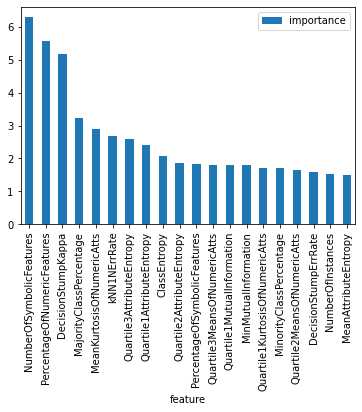

In [8]:
pd.DataFrame(zip(X_train.columns,model.feature_importances_), columns=["feature", "importance"]).sort_values("importance", ascending=False).iloc[:20].plot.bar(x="feature", y="importance")

In [9]:

import tensorflow as tf
from tensorflow import keras

normalizer = keras.layers.Normalization(axis=-1, name='normalizer')
normalizer.adapt(X_train)

2022-03-21 15:52:08.129186: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam", )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalizer (Normalization)  (None, 107)               215       
                                                                 
 dense (Dense)               (None, 128)               13824     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [11]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0500 - val_loss: 0.0440
Epoch 2/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0167 - val_loss: 0.0063
Epoch 3/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 4/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 5/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 6/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 7/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/50
198/198 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 10/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0036

In [12]:
!pip install tensorflow-addons

     |████████████████████████████████| 588 kB 4.8 MB/s eta 0:00:01


In [13]:
import keras_tuner as kt
import tensorflow_addons as tfa


def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(normalizer)
    for n_layer in range(hp.Int('n_layers', 1, 6, default=2)):
        model.add(keras.layers.Dense(hp.Int('n_units_'+str(n_layer), 1, 512), activation=hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_'+str(n_layer), 0, 0.5, step=0.05)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))])
    return model

tuner = kt.Hyperband(build_model,
                        objective=kt.Objective("r_square", "max"),
                        max_epochs=100,
                        directory='/tmp/keras_tuner',
                        project_name='lastduel',
                        overwrite=True)
tuner.search(X_train, y_train, epochs=10, validation_split=0.2) 

Trial 9 Complete [00h 00m 03s]
r_square: -2.6324565410614014

Best r_square So Far: 0.20428985357284546
Total elapsed time: 00h 00m 30s

Search: Running Trial #10

Hyperparameter    |Value             |Best Value So Far 
n_layers          |4                 |3                 
n_units_0         |301               |328               
activation        |relu              |tanh              
dropout_0         |0.05              |0.3               
n_units_1         |359               |375               
dropout_1         |0.2               |0.1               
n_units_2         |120               |1                 
dropout_2         |0.05              |0                 
n_units_3         |452               |None              
dropout_3         |0.35              |None              
n_units_4         |390               |None              
dropout_4         |0.05              |None              
n_units_5         |471               |None              
dropout_5         |0.5               |

KeyboardInterrupt: 

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
from google.colab import files

best_model.save('best_model_h5', save_format='h5')
files.download('best_model_h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, best_model.predict(X_test)), r2_score(y_test, best_model.predict(X_test))

(0.00385789323120996, 0.6142371867666576)